In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# Note, I suppress this future warning because Pandas is throwing a false positive. I've indicated where this warning was in the notebook below.
pd.set_option('mode.chained_assignment', None)

In [2]:
df = pd.read_csv("../data/arxiv.csv")
df.head()

,title,journal,authors,doi,published,abstract,url,tags
0,Heavy quark radiation in an anisotropic hot QC...,NaN,"[{'name': 'Jai Prakash'}, {'name': 'Vinod Chan...",NaN,2023-06-13T17:59:05Z,The impact of momentum anisotropy on the heavy...,http://arxiv.org/abs/2306.07966v1,"[{'term': 'hep-ph', 'scheme': 'http://arxiv.or..."
1,Electron Localization in Rydberg States,"Acta Phys. Pol. A 143(6), S140 (2023)","[{'name': 'Jan Mostowski'}, {'name': 'Joanna P...",10.12693/APhysPolA.143.S140,2023-06-13T17:45:28Z,We discuss the possibility of localizing an el...,http://arxiv.org/abs/2306.07950v1,"[{'term': 'quant-ph', 'scheme': 'http://arxiv...."
2,JCCS-PFGM: A Novel Circle-Supervision based Po...,NaN,"[{'name': 'Rongjun Ge'}, {'name': 'Yuting He'}...",NaN,2023-06-13T14:56:48Z,Multiphase contrast-enhanced computed tomograp...,http://arxiv.org/abs/2306.07824v1,"[{'term': 'eess.IV', 'scheme': 'http://arxiv.o..."
3,Free Energy of Coupled Oscillators: Lamb Shift...,"Acta Physica Polonica A 143, S78 (2023)",[{'name': 'Peter W. Milonni'}],10.12693/APhysPolA.143.S78,2023-06-13T13:09:31Z,The Helmholtz free energy of oscillators in th...,http://arxiv.org/abs/2306.07750v1,"[{'term': 'quant-ph', 'scheme': 'http://arxiv...."
4,How to cross an energy barrier at zero Kelvin ...,NaN,"[{'name': 'Seiji Miyashita'}, {'name': 'Bernar...",NaN,2023-06-13T12:32:05Z,This paper deals with the broad class of magne...,http://arxiv.org/abs/2306.07729v1,"[{'term': 'quant-ph', 'scheme': 'http://arxiv...."


In [66]:
test = df["published"].apply(lambda x: x.split('T')[0])
dates = [datetime(int(i.split("-")[0]), int(i.split("-")[1]), int(i.split("-")[2])) for i in test]

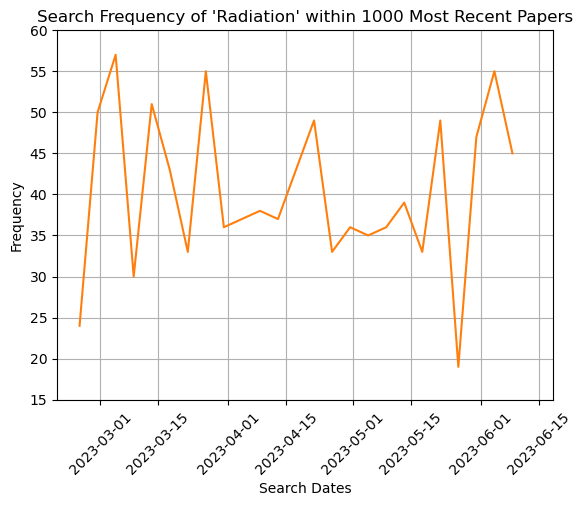

In [65]:
plt.title("Search Frequency of 'Radiation' within 1000 Most Recent Papers")
plt.xlabel("Search Dates")
plt.ylabel("Frequency")
plt.grid("True")
plt.xticks(rotation=45)
counts, bins, bars = plt.hist(dates, 25, alpha=0)
plt.plot(bins[:-1], counts)
plt.ylim(15, 60)
plt.show()